<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Rice_Leafs_500px.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This dataset is located at https://www.kaggle.com/datasets/gutierrezsoares/rice-leafs-500px

In [ ]:
!pip install kaggle
# The command pip install kaggle
# is used to install the Kaggle Python package using the pip package manager

In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kehindeoluwaseun","key":"34b8688e556df9e46dd1bf0ae96b6056"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# The set of code above are used to set up the Kaggle API key on my computer.
# The purpose of these commands is to create a directory named .kaggle
# in the home directory, we move the Kaggle API key file (kaggle.json) into
# that directory, and set the appropriate permissions to ensure that only
# the owner has read and write access to the API key file.
# This is done for security reasons to protect your Kaggle API credentials
# from unauthorized access. The Kaggle API key is used to authenticate and
# interact with the Kaggle platform programmatically.

In [ ]:
!kaggle datasets download -d gutierrezsoares/rice-leafs-500px


 98% 249M/255M [00:06<00:00, 60.5MB/s]
100% 255M/255M [00:06<00:00, 39.2MB/s]


In [ ]:
!unzip rice-leafs-500px -d rice-leafs-500px

Archive:  rice-leafs-500px.zip
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190157.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190201.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190208.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190217.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190225.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190227.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190239.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190243.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190246.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190248.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190255.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190305.jpg  
  inflating: rice-leafs-500px/train/BrownSpot/IMG_20190420_190308.jpg  
  inflating: rice-leafs-500px/tra

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
import cv2
import os
# the code imports essential libraries for data analysis (pandas, numpy),
# file and directory manipulation (glob, os), and image processing (cv2).
# These libraries are commonly used in tasks related to data science,
# machine learning, and computer vision.
# Definition of the paths to the rice-leafs-500px-dataset image folders (BrownSpot, Healthy, Hispa, LeafBlast and NeckBlast)
BrownSpot_folder = '/content/rice-leafs-500px/train/BrownSpot'
Healthy_folder = '/content/rice-leafs-500px/train/Healthy'
Hispa_folder = '/content/rice-leafs-500px/train/Hispa'
LeafBlast_folder = '/content/rice-leafs-500px/train/LeafBlast'
# We are initializing the lists to store images and labels
images = []
labels = []
# We Load and pre-process rice-leafs-500px Dataset images (Brown Spot)
for filename in os.listdir(BrownSpot_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(BrownSpot_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(0)  # 0 represents Brown Spot
# We Load and pre-process rice-leafs-500px Dataset images (Healthy)
for filename in os.listdir(Healthy_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Healthy_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(1)  # 1 represents Healthy
# We Load and pre-process rice-leafs-500px Dataset images (Hispa)
for filename in os.listdir(Hispa_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(Hispa_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(2)  # 2 represents Hispa
# We Load and pre-process rice-leafs-500px Dataset images (Leaf Blast)
for filename in os.listdir(LeafBlast_folder):
    if filename.endswith('.jpg'):
        img = cv2.imread(os.path.join(LeafBlast_folder, filename))
        img = cv2.resize(img, (128, 128))  # Resize the image to a common size
        images.append(img)
        labels.append(3)  # 3 represents LeafBlast
# We Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

# We are Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Assuming we have already loaded and pre-processed data
# (x_train, y_train, x_test, y_test)

# Definition of the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes: BrownSpot, Healthy, Hispa, LeafBlast and NeckBlast
])

# Compilation of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training of the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/30
68/68 [==============================] - 56s 814ms/step - loss: 68.7406 - accuracy: 0.3791 - val_loss: 1.3174 - val_accuracy: 0.4525
Epoch 2/30
68/68 [==============================] - 56s 820ms/step - loss: 1.1480 - accuracy: 0.4979 - val_loss: 1.2902 - val_accuracy: 0.4283
Epoch 3/30
68/68 [==============================] - 53s 777ms/step - loss: 0.9257 - accuracy: 0.6171 - val_loss: 1.4169 - val_accuracy: 0.4674
Epoch 4/30
68/68 [==============================] - 54s 793ms/step - loss: 0.7052 - accuracy: 0.7187 - val_loss: 1.3790 - val_accuracy: 0.4246
Epoch 5/30
68/68 [==============================] - 57s 836ms/step - loss: 0.5421 - accuracy: 0.7867 - val_loss: 1.7074 - val_accuracy: 0.4600
Epoch 6/30
68/68 [==============================] - 57s 845ms/step - loss: 0.4139 - accuracy: 0.8533 - val_loss: 1.8847 - val_accuracy: 0.4600
Epoch 7/30
68/68 [==============================] - 57s 835ms/step - loss: 0.2961 - accuracy: 0.9059 - val_loss: 1.9962 - val_accuracy: 0.430

In [ ]:
# This section of code is to perform a cross validation on the model

import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold

# Assuming you have loaded and pre-processed data (x_train, y_train)

# Number of folds for cross-validation
num_folds = 5

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store the training and validation accuracies
train_accuracies = []
val_accuracies = []

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(stratified_kfold.split(x_train, y_train)):
    # Split the data into training and validation sets for this fold
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Definition of the model
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(5, activation='softmax')  # 5 classes
    ])

    # Compilation of the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training of the model
    history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    # Evaluate and store training and validation accuracy for this fold
    _, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
    _, val_accuracy = model.evaluate(x_val_fold, y_val_fold)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Print the average training and validation accuracies across folds
print(f"\nAverage Training Accuracy: {sum(train_accuracies) / num_folds:.4f}")
print(f"Average Validation Accuracy: {sum(val_accuracies) / num_folds:.4f}")


Epoch 1/30
54/54 [==============================] - 54s 936ms/step - loss: 77.1591 - accuracy: 0.3588 - val_loss: 1.4650 - val_accuracy: 0.4116
Epoch 2/30
54/54 [==============================] - 47s 866ms/step - loss: 1.3591 - accuracy: 0.4438 - val_loss: 1.4524 - val_accuracy: 0.4000
Epoch 3/30
54/54 [==============================] - 48s 880ms/step - loss: 1.1497 - accuracy: 0.4968 - val_loss: 1.3482 - val_accuracy: 0.3721
Epoch 4/30
54/54 [==============================] - 53s 982ms/step - loss: 0.9320 - accuracy: 0.6080 - val_loss: 1.5518 - val_accuracy: 0.4395
Epoch 5/30
54/54 [==============================] - 64s 1s/step - loss: 0.7328 - accuracy: 0.7181 - val_loss: 1.6738 - val_accuracy: 0.3907
Epoch 6/30
54/54 [==============================] - 51s 954ms/step - loss: 0.6097 - accuracy: 0.7816 - val_loss: 1.9825 - val_accuracy: 0.4465
Epoch 7/30
54/54 [==============================] - 60s 1s/step - loss: 0.4489 - accuracy: 0.8427 - val_loss: 2.3255 - val_accuracy: 0.4209
Epoc

The provided code performs k-fold cross-validation for a convolutional neural network (CNN) using TensorFlow and Keras. Here's an explanation of each part:

1. **Import Libraries:**
   ```python
   import tensorflow as tf
   from tensorflow.keras import layers
   from sklearn.model_selection import StratifiedKFold
   ```
   Import the necessary libraries: TensorFlow for building and training neural networks, Keras for defining the model architecture, and `StratifiedKFold` from scikit-learn for performing stratified k-fold cross-validation.

2. **Specify the Number of Folds:**
   ```python
   num_folds = 5
   ```
   Set the number of folds for cross-validation. In this case, it's set to 5, meaning the dataset will be split into 5 folds for training and validation.

3. **Initialize StratifiedKFold:**
   ```python
   stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
   ```
   Initialize the `StratifiedKFold` object with the specified number of folds. This ensures that the class distribution is approximately the same in each fold.

4. **Lists for Storing Accuracies:**
   ```python
   train_accuracies = []
   val_accuracies = []
   ```
   Create empty lists to store training and validation accuracies for each fold.

5. **Cross-Validation Loop:**
   ```python
   for fold, (train_index, val_index) in enumerate(stratified_kfold.split(x_train, y_train)):
   ```
   Iterate over the folds using `enumerate` and `stratified_kfold.split`. For each fold, it provides indices for the training and validation sets.

6. **Split Data for the Current Fold:**
   ```python
   x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
   y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
   ```
   Split the training data (`x_train` and `y_train`) into training and validation sets for the current fold using the indices obtained from `stratified_kfold.split`.

7. **Define the Model:**
   ```python
   model = tf.keras.Sequential([
       layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
       layers.MaxPooling2D((2, 2)),
       layers.Conv2D(64, (3, 3), activation='relu'),
       layers.MaxPooling2D((2, 2)),
       layers.Flatten(),
       layers.Dense(64, activation='relu'),
       layers.Dense(5, activation='softmax')
   ])
   ```
   Define the CNN model architecture.

8. **Compile the Model:**
   ```python
   model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   ```
   Compile the model, specifying the optimizer, loss function, and metrics.

9. **Train the Model:**
   ```python
   history = model.fit(x_train_fold, y_train_fold, epochs=30, batch_size=32, validation_data=(x_val_fold, y_val_fold))
   ```
   Train the model on the current fold's training data and validate on the validation data.

10. **Evaluate and Store Accuracies:**
    ```python
    _, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
    _, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    ```
    Evaluate the model on the training and validation sets and store the accuracies in the respective lists.

11. **Print Average Accuracies:**
    ```python
    print(f"\nAverage Training Accuracy: {sum(train_accuracies) / num_folds:.4f}")
    print(f"Average Validation Accuracy: {sum(val_accuracies) / num_folds:.4f}")
    ```
    Print the average training and validation accuracies across all folds.

This code helps to assess the model's performance more robustly by training and validating it on different subsets of the data, which can be useful for understanding how well the model generalizes to unseen data. The architecture could be adjusted on the hyperparameters based on the cross-validation results.

In [ ]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

# Here we interpret the label using our dataset's class labels (0 BrownSpot, 1 Healthy, 2 Hispa, 3 LeafBlast, 4 NeckBlast)
class_labels = 'BrownSpot', 'Healthy','Hispa','LeafBlast','NeckBlast'
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 147ms/step
Predicted class: Healthy


In [ ]:
# Predicting on a single image
sample_image = x_test[3]  # Here we replace with our image data
predictions = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 29ms/step


In [ ]:
from google.colab import files
files.upload()
# This line of code is used to upload files from
# the local machine to the Colab environment.

Saving IMG_20190419_095712.jpg to IMG_20190419_095712.jpg


{'IMG_20190419_095712.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x04\x08Exif\x00\x00II*\x00\x08\x00\x00\x00\x0e\x00\x0f\x01\x02\x00\x07\x00\x00\x00\xb6\x00\x00\x00\x10\x01\x02\x00\r\x00\x00\x00\xbe\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\t\x00\x01\x00\x00\x00,\x01\x00\x00\x1b\x01\t\x00\x01\x00\x00\x00,\x01\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\x10\x00\x00\x00\xcc\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xdc\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00FG\t\x00\x01\x00\x00\x00\x01\x00\x00\x00IG\t\x00\x01\x00\x00\x00\x14\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\x04\x01\x00\x00%\x88\x04\x00\x01\x00\x00\x00\x1a\x03\x00\x00\x03\x90\x02\x00\x14\x00\x00\x00\xf0\x00\x00\x00\x00\x00\x00\x00Xiaomi\x00\x00Redmi Note 4\x00\x00darktable 2.4.2\x002019:04:30 22:40:57\x002019:04:19 09:57:12\x00\x1d\x00\x9a\x82\x05\x00\x01\x00\x00\x00f\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00n\x02\x00\x00"\x88\x

In [ ]:
# we test the model with a new photo from the internet.
# we know already that this new image is a LeafBlast image.
from PIL import Image
import numpy as np

# Load the new image
new_image_path = '/content/rice-leafs-500px/validation/BrownSpot/IMG_20190419_095712.jpg'
# Replace with the actual path to your new image
new_image = Image.open(new_image_path)

# Resize the image to match the input size expected by your model
input_size = (128, 128)  # Adjust this size based on your model's input size
new_image = new_image.resize(input_size)

# Convert the PIL image to a NumPy array
new_image_array = np.array(new_image)

# Normalize the image pixel values (if needed)
new_image_array = new_image_array / 255.0

# Making predictions on the new image
predictions = model.predict(np.expand_dims(new_image_array, axis=0))
predicted_label = np.argmax(predictions)

# Interpret the label using your dataset's class labels
class_labels = ['BrownSpot', 'Healthy','Hispa','LeafBlast','NeckBlast']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

# Close the image
new_image.close()

1/1 [==============================] - 0s 213ms/step
Predicted class: BrownSpot


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 57600)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

17/17 [==============================] - 5s 284ms/step


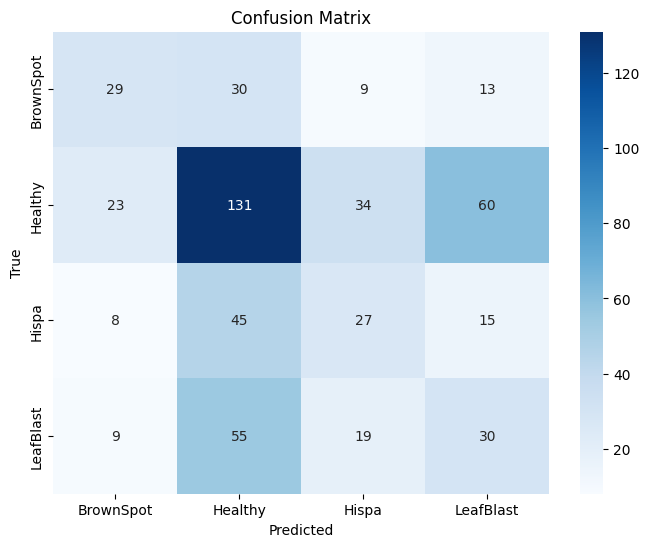

              precision    recall  f1-score   support

   BrownSpot       0.42      0.36      0.39        81
     Healthy       0.50      0.53      0.51       248
       Hispa       0.30      0.28      0.29        95
   LeafBlast       0.25      0.27      0.26       113

    accuracy                           0.40       537
   macro avg       0.37      0.36      0.36       537
weighted avg       0.40      0.40      0.40       537



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted_labels' are the model's predicted labels for the test set
# 'y_test' contains the true labels of the test set

# Convert one-hot encoded predictions to class labels
predicted_labels = model.predict(x_test)
predicted_labels = tf.argmax(predicted_labels, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['BrownSpot', 'Healthy','Hispa','LeafBlast'], yticklabels=['BrownSpot', 'Healthy','Hispa','LeafBlast'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
class_report = classification_report(y_test, predicted_labels, target_names=['BrownSpot', 'Healthy','Hispa','LeafBlast'])
print(class_report)

The provided code uses scikit-learn's `confusion_matrix` and `classification_report` functions to evaluate the performance of a classification model, and then visualizes the results using a heatmap. Here's a breakdown of the code:

1. **Import Libraries:**
   ```python
   from sklearn.metrics import confusion_matrix, classification_report
   import seaborn as sns
   import matplotlib.pyplot as plt
   ```

2. **Make Predictions:**
   ```python
   predicted_labels = model.predict(x_test)
   predicted_labels = tf.argmax(predicted_labels, axis=1)
   ```
   Obtain predicted labels from the model's predictions. If the model output is in one-hot encoded format, use `tf.argmax` to convert it to class labels.

3. **Create Confusion Matrix:**
   ```python
   conf_matrix = confusion_matrix(y_test, predicted_labels)
   ```
   Use scikit-learn's `confusion_matrix` to compute the confusion matrix.

4. **Display Confusion Matrix Using Heatmap:**
   ```python
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast'], yticklabels=['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast'])
   plt.xlabel('Predicted')
   plt.ylabel('True')
   plt.title('Confusion Matrix')
   plt.show()
   ```
   Visualize the confusion matrix using a heatmap with seaborn and matplotlib.

5. **Display Classification Report:**
   ```python
   class_report = classification_report(y_test, predicted_labels, target_names=['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast'])
   print(class_report)
   ```
   Use scikit-learn's `classification_report` to compute and display precision, recall, F1-score, and support for each class.

This code provides a comprehensive analysis of the model's performance, helping us to understand how well it is performing for each class in terms of precision, recall, and F1-score. The confusion matrix heatmap visually represents the true positives, false positives, true negatives, and false negatives for each class. The target names in the code could be adjusted according to the desired class labels.